# Intel Image Classification

## Importing Libraries

In [21]:
# Imports
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import LabelEncoder
import random
import tensorflow as tf
from PIL import Image
import PIL.Image
from tensorflow.keras.models import Model,load_model, Sequential
from tensorflow.keras.layers import  GlobalAveragePooling2D, Dropout, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import  Adam
from tensorflow.keras.applications.resnet50 import ResNet50
import matplotlib.image as mpimg
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


## Data load and Data visualization (Images)

Categories (6): ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

For training data:


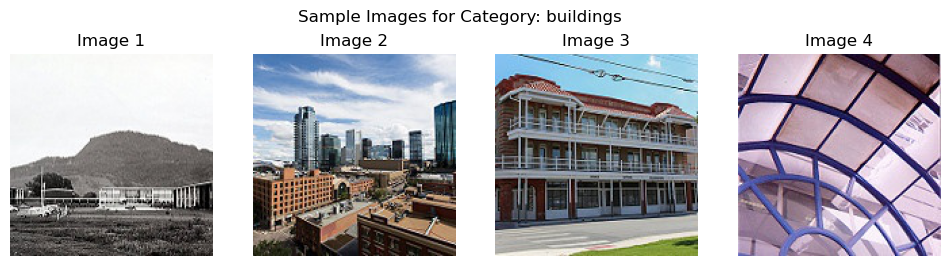

Number of images in buildings : 2191


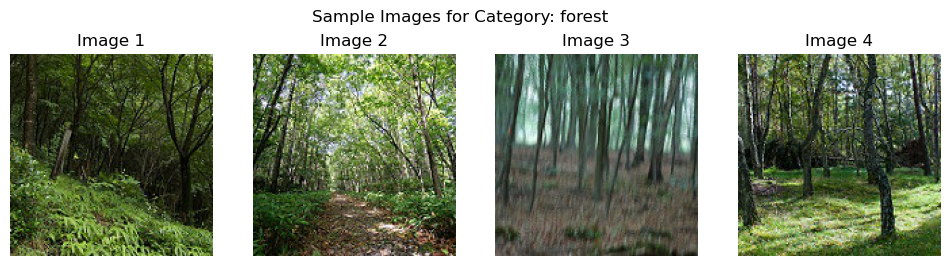

Number of images in forest : 2271


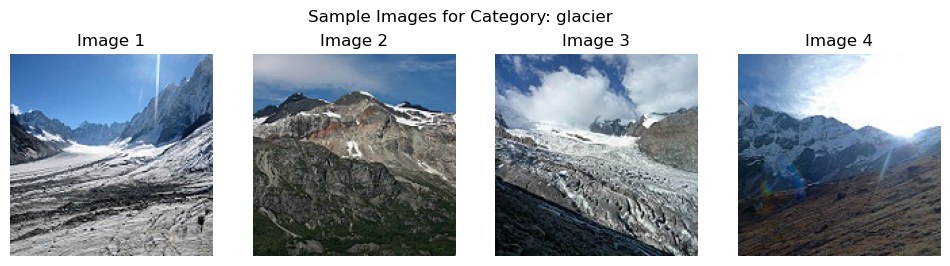

Number of images in glacier : 2404


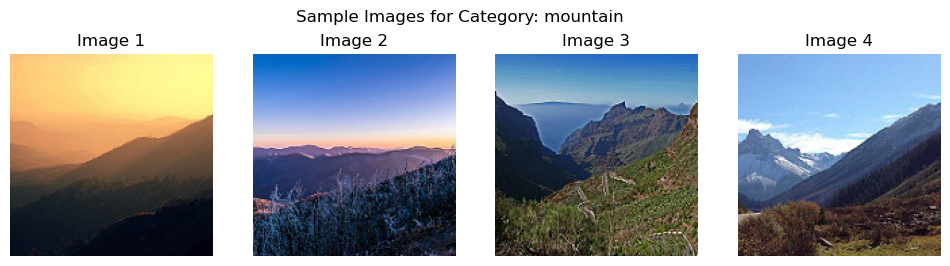

Number of images in mountain : 2512


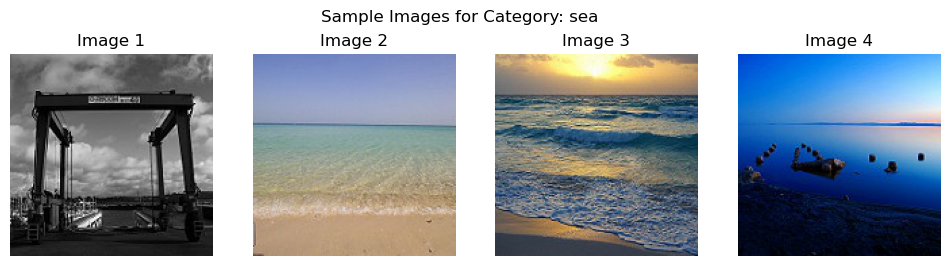

Number of images in sea : 2274


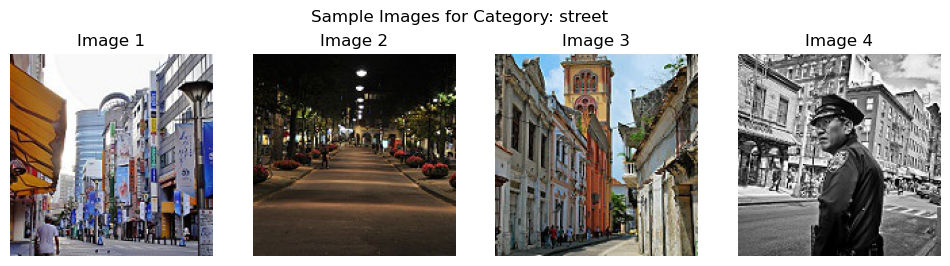

Number of images in street : 2382
Total number of images for training: 14034

--------------------------------------------------

For testing data:


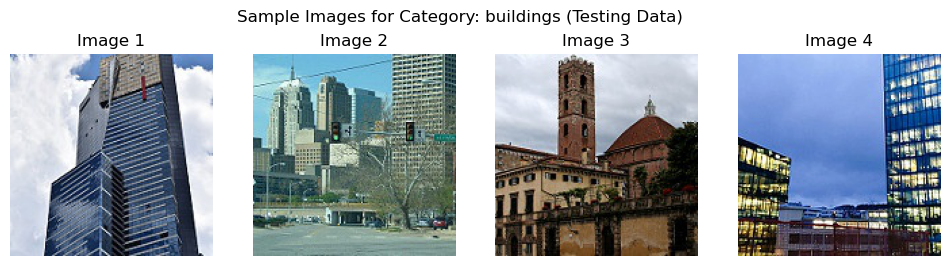

Number of images in buildings for testing data: 437


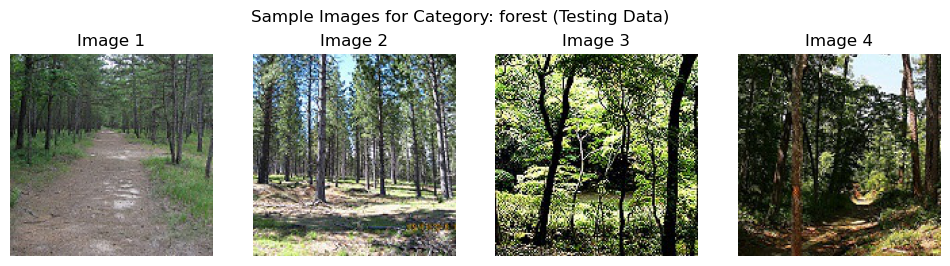

Number of images in forest for testing data: 474


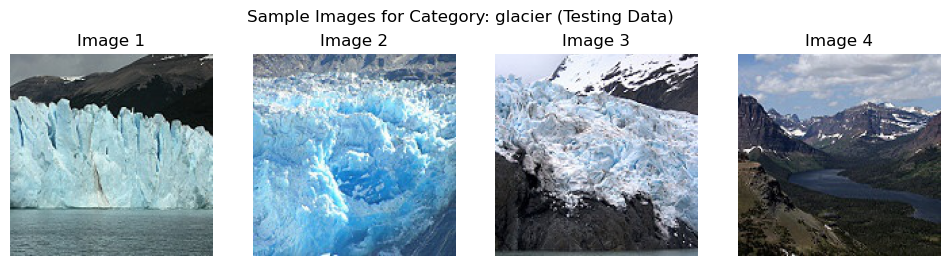

Number of images in glacier for testing data: 553


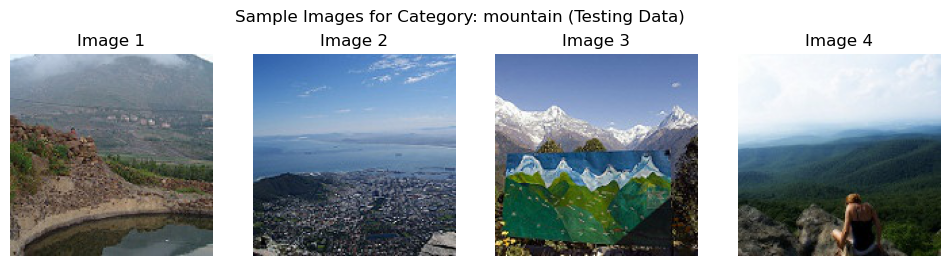

Number of images in mountain for testing data: 525


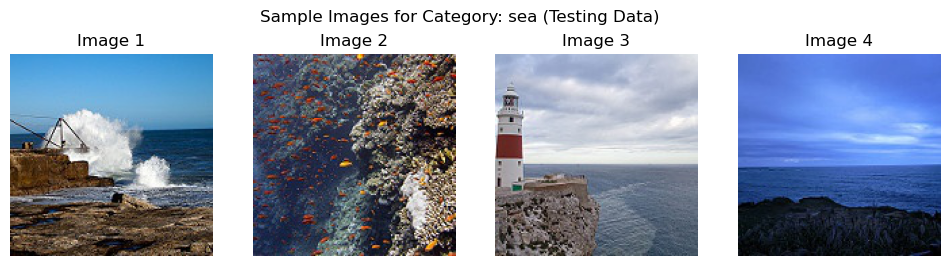

Number of images in sea for testing data: 510


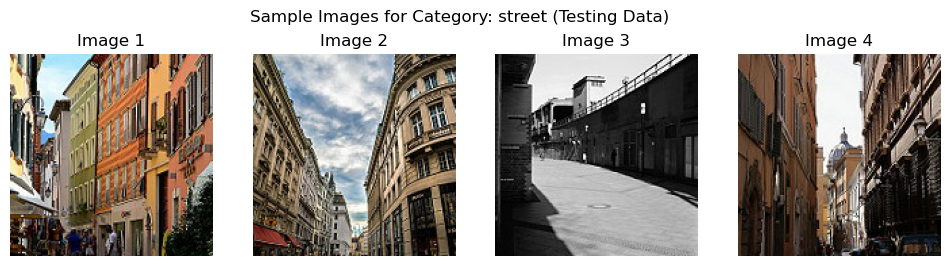

Number of images in street for testing data: 501
Total number of images for testing: 3000


In [3]:

# Define the paths to the training and testing data directories
Data_train = "seg_train/seg_train"
Data_test = "seg_test/seg_test"

# Get the list of all the categories (e.g., types of images)
categories = os.listdir(Data_train)

# Print the list of categories and the total number of categories
print("Categories (" + str(len(categories)) + "):", categories)

# Initialize lists to store the number of images in each category for training and testing data
train_counts = []
test_counts = []

# For training data
print("\nFor training data:")
# Initialize a variable to keep track of the total number of training images
total_train = 0

# Loop through each category to count the number of images in each category
for category in categories:
    # Get the list of image files in the current category
    category_path = os.path.join(Data_train, category)
    category_images = os.listdir(category_path)
    
    # Count the number of images in the current category
    num_images_in_category = len(category_images)
    
    # Display the first few images from each category for illustration
    num_to_display = min(4, num_images_in_category)
    plt.figure(figsize=(12, 3))
    plt.suptitle(f"Sample Images for Category: {category}")
    for i in range(num_to_display):
        image_path = os.path.join(category_path, category_images[i])
        img = mpimg.imread(image_path)
        plt.subplot(1, num_to_display, i + 1)
        plt.imshow(img)
        plt.title(f"Image {i + 1}")
        plt.axis('off')
    plt.show()
    
    # Print the category and the number of images in that category
    print("Number of images in", category, ":", num_images_in_category)
    
    # Update the total number of training images
    total_train += num_images_in_category

    # Store the count of images in the current category
    train_counts.append(num_images_in_category)

# Print the total number of training images
print("Total number of images for training:", total_train)

# Separator
print("\n--------------------------------------------------\n")

# For testing data
print("For testing data:")
# Initialize a variable to keep track of the total number of testing images
total_test = 0

# Loop through each category to count the number of images in each category for testing data
for category in categories:
    # Get the list of image files in the current category for testing data
    category_path = os.path.join(Data_test, category)
    category_images = os.listdir(category_path)
    
    # Count the number of images in the current category for testing data
    num_images_in_category = len(category_images)
    
    # Display the first few images from each category for illustration
    num_to_display = min(4, num_images_in_category)
    plt.figure(figsize=(12, 3))
    plt.suptitle(f"Sample Images for Category: {category} (Testing Data)")
    for i in range(num_to_display):
        image_path = os.path.join(category_path, category_images[i])
        img = mpimg.imread(image_path)
        plt.subplot(1, num_to_display, i + 1)
        plt.imshow(img)
        plt.title(f"Image {i + 1}")
        plt.axis('off')
    plt.show()
    
    # Print the category and the number of images in that category for testing data
    print("Number of images in", category, "for testing data:", num_images_in_category)
    
    # Update the total number of testing images
    total_test += num_images_in_category

    # Store the count of images in the current category for testing data
    test_counts.append(num_images_in_category)

# Print the total number of testing images
print("Total number of images for testing:", total_test)

## Data Visualization (Graphs)

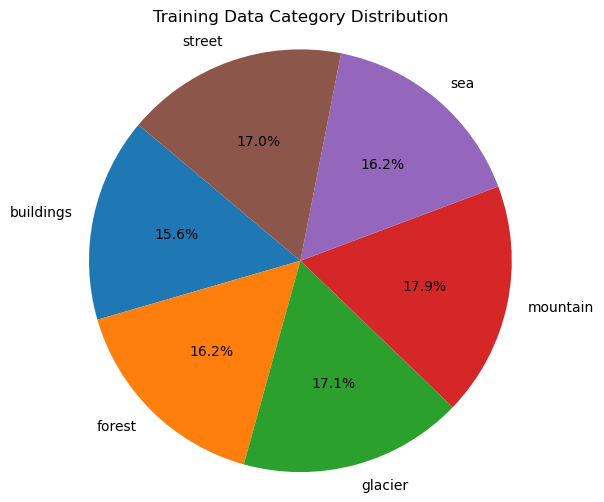

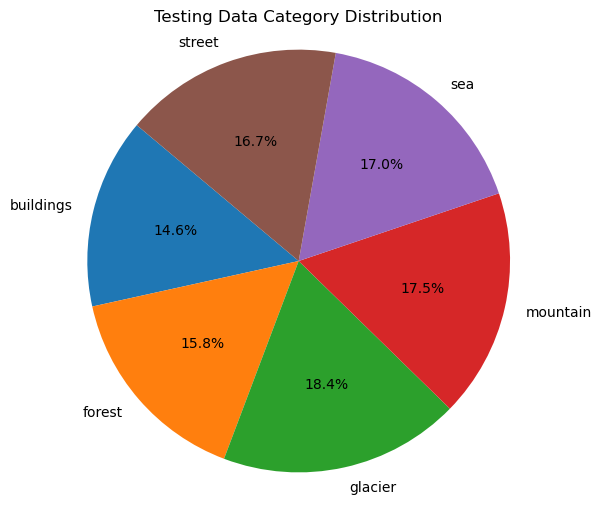

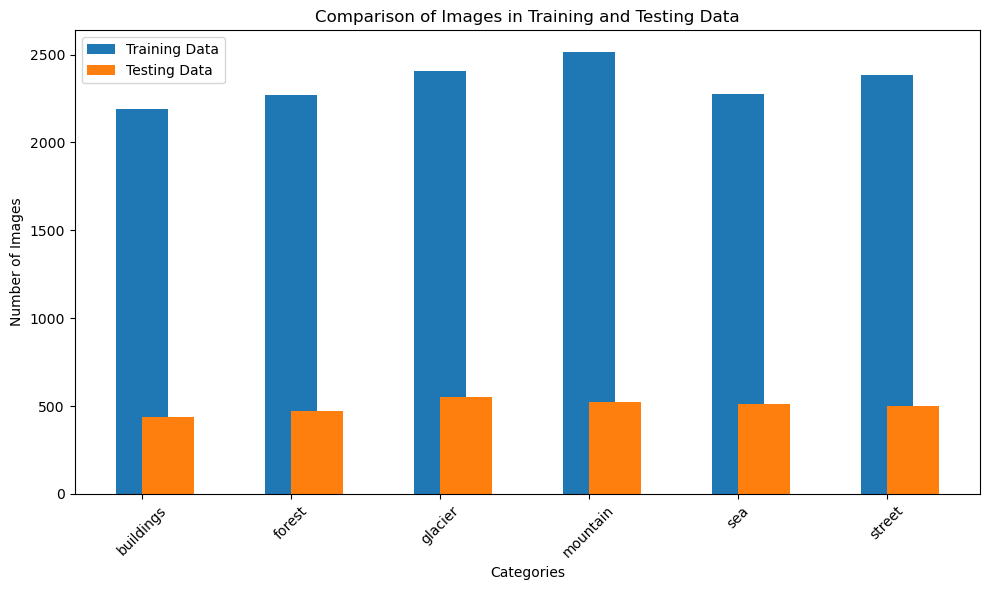

In [4]:
# Create a pie chart for training data
plt.figure(figsize=(6, 6))
plt.pie(train_counts, labels=categories, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Training Data Category Distribution')
plt.show()

# Create a pie chart for testing data
plt.figure(figsize=(6, 6))
plt.pie(test_counts, labels=categories, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Testing Data Category Distribution')
plt.show()

# Create a bar graph to compare the number of images between training and testing data
plt.figure(figsize=(10, 6))
width = 0.35
x = range(len(categories))
plt.bar(x, train_counts, width, label='Training Data', align='center')
plt.bar(x, test_counts, width, label='Testing Data', align='edge')
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Comparison of Images in Training and Testing Data')
plt.xticks(x, categories, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Label Encoding

In [5]:
# Label Encoding for the categories
le = LabelEncoder()
le.fit(categories)
print("Categories:", categories)
print("Encoded Labels:", le.transform(categories))


Categories: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
Encoded Labels: [0 1 2 3 4 5]


## Data Preprocessing

In [6]:
# Data Preprocessing

# Create an ImageDataGenerator for training data with rescaling
train_datagen = ImageDataGenerator(rescale=1./255)

# Create an ImageDataGenerator for testing data with rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# Create a generator for training data
train_generator = train_datagen.flow_from_directory(
        Data_train,             # Directory containing training data
        target_size=(150, 150),  # Target image size
        batch_size=32,           # Batch size
        color_mode="rgb",        # Color mode
        class_mode='categorical' # Type of labels (categorical for multi-class classification)
)

# Create a generator for testing data
test_generator = test_datagen.flow_from_directory(
        Data_test,              # Directory containing testing data
        target_size=(150, 150),  # Target image size
        batch_size=32,           # Batch size
        color_mode="rgb",        # Color mode
        class_mode='categorical' # Type of labels (categorical for multi-class classification)
)

# Load the next batch of training data images and their corresponding labels
train_images, train_labels = train_generator.next()

# Load the next batch of testing data images and their corresponding labels
test_images, test_labels = test_generator.next()

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


## Implementing CNN Model

### Model ResNet50

In [7]:
model2 = ResNet50(include_top=False, weights='imagenet', input_shape=(150,150,3))
ResNet = model2.output
ResNet = GlobalAveragePooling2D()(ResNet)
ResNet = Dropout(0.25)(ResNet)
predictions = Dense(6, activation='softmax')(ResNet)
ResNet50 = Model(inputs=model2.input, outputs=predictions)


In [8]:
adam = Adam(learning_rate = 0.0001)
ResNet50.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
History = ResNet50.fit(train_generator, batch_size= 128, epochs=5, validation_data=test_generator, verbose=1)

Epoch 1/5
439/439 [==============================] - 789s 2s/step - loss: 0.3498 - accuracy: 0.8795 - val_loss: 1.6305 - val_accuracy: 0.4560
Epoch 2/5
439/439 [==============================] - 782s 2s/step - loss: 0.1332 - accuracy: 0.9553 - val_loss: 0.4403 - val_accuracy: 0.8580
Epoch 3/5
439/439 [==============================] - 783s 2s/step - loss: 0.0802 - accuracy: 0.9729 - val_loss: 0.2469 - val_accuracy: 0.9220
Epoch 4/5
439/439 [==============================] - 786s 2s/step - loss: 0.0592 - accuracy: 0.9810 - val_loss: 0.3024 - val_accuracy: 0.9070
Epoch 5/5
439/439 [==============================] - 783s 2s/step - loss: 0.0545 - accuracy: 0.9823 - val_loss: 0.3045 - val_accuracy: 0.9087


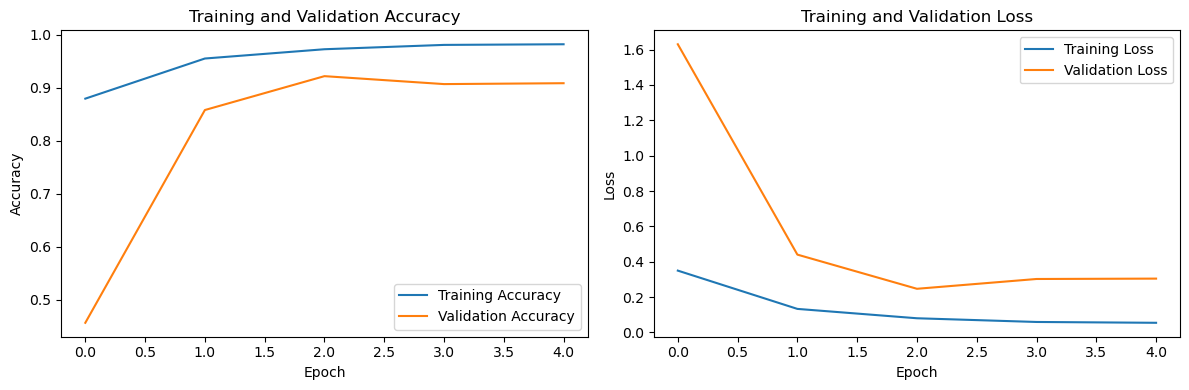

In [14]:
# Plot the training and validation accuracy and loss at each epoch
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(History.history['accuracy'], label='Training Accuracy')
plt.plot(History.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(History.history['loss'], label='Training Loss')
plt.plot(History.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Save the model
ResNet50.save('ResNet50.h5')


1/1 [==============================] - 1s 784ms/step


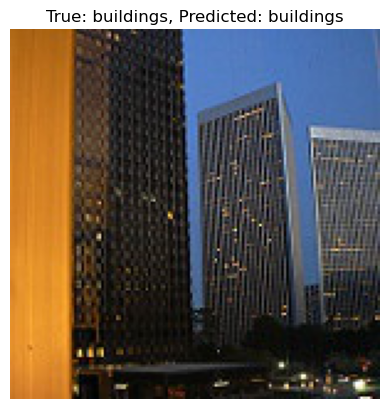

1/1 [==============================] - 0s 49ms/step


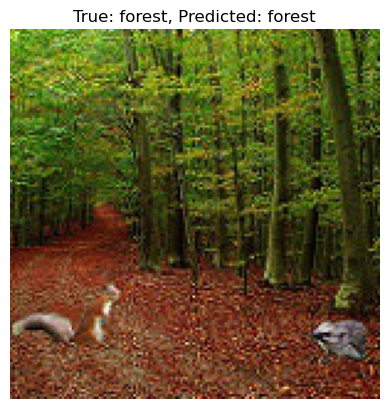

1/1 [==============================] - 0s 50ms/step


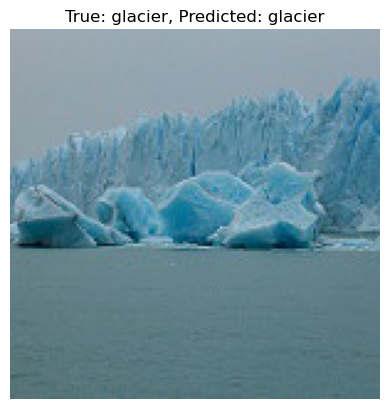

1/1 [==============================] - 0s 53ms/step


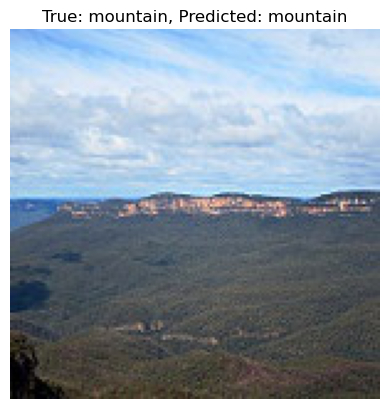

1/1 [==============================] - 0s 54ms/step


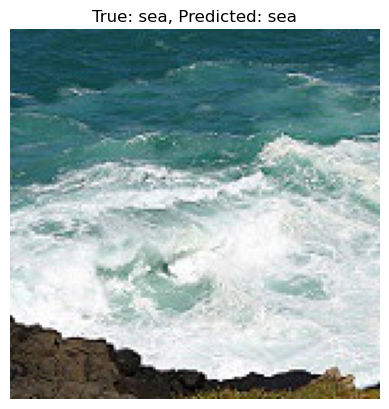

1/1 [==============================] - 0s 50ms/step


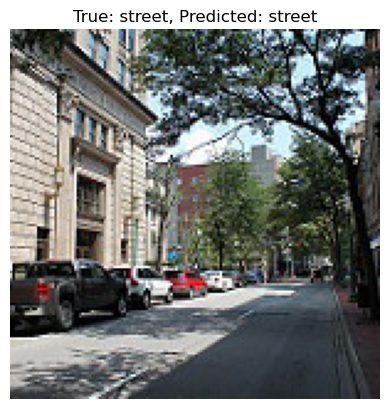

In [27]:
# Load the trained ResNet50 model
model = load_model('ResNet50.h5')

# Initialize a list to store the category names and corresponding image file names
image_samples = []

# Randomly select 5 images from different categories
for category in categories:
    category_path = os.path.join(Data_test, category)
    category_images = os.listdir(category_path)
    
    if len(category_images) > 0:
        # Randomly select an image from the category
        random_image = np.random.choice(category_images)
        image_path = os.path.join(category_path, random_image)
        image_samples.append((category, image_path))

# Create a function to predict and display the image
def predict_and_display_image(model, category, image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Rescale the image
    prediction = model.predict(img)
    predicted_category = categories[np.argmax(prediction)]

    plt.figure()
    plt.imshow(mpimg.imread(image_path))
    plt.title(f"True: {category}, Predicted: {predicted_category}")
    plt.axis('off')
    plt.show()

# Predict and display the selected images
for category, image_path in image_samples:
    predict_and_display_image(model, category, image_path)

### Other model

In [28]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)), # 32 filters, 3x3 kernel size
    tf.keras.layers.MaxPooling2D(2, 2), # 2x2 pool size
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), # 64 filters, 3x3 kernel size
    tf.keras.layers.MaxPooling2D(2,2), # 2x2 pool size
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), # 128 filters, 3x3 kernel size
    tf.keras.layers.MaxPooling2D(2,2), # 2x2 pool size
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), # 128 filters, 3x3 kernel size
    tf.keras.layers.MaxPooling2D(2,2), # 2x2 pool size
    tf.keras.layers.Flatten(), # Flatten the input
    tf.keras.layers.Dense(512, activation='relu'), # 512 neurons in the hidden layer
    tf.keras.layers.Dense(6, activation='softmax') # 6 output neurons for 6 classes
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

## Training the Model

In [29]:
from keras.callbacks import ReduceLROnPlateau

# Train the model
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.00001)

history = model.fit(
    train_generator,
    validation_data = test_generator,
    epochs = 20,
    steps_per_epoch = 100,
    validation_steps = 50,
    verbose = 1,
    callbacks = [reduce_lr]
)


Epoch 1/20
100/100 [==============================] - 29s 282ms/step - loss: 1.2956 - accuracy: 0.4919 - val_loss: 1.0812 - val_accuracy: 0.5462 - lr: 0.0010
Epoch 2/20
100/100 [==============================] - 26s 260ms/step - loss: 1.0101 - accuracy: 0.5913 - val_loss: 0.9617 - val_accuracy: 0.6300 - lr: 0.0010
Epoch 3/20
100/100 [==============================] - 25s 246ms/step - loss: 0.8811 - accuracy: 0.6606 - val_loss: 0.8850 - val_accuracy: 0.6656 - lr: 0.0010
Epoch 4/20
100/100 [==============================] - 25s 246ms/step - loss: 0.7929 - accuracy: 0.6978 - val_loss: 0.7682 - val_accuracy: 0.7231 - lr: 0.0010
Epoch 5/20
100/100 [==============================] - 24s 242ms/step - loss: 0.7298 - accuracy: 0.7298 - val_loss: 0.7379 - val_accuracy: 0.7375 - lr: 0.0010
Epoch 6/20
100/100 [==============================] - 24s 244ms/step - loss: 0.6825 - accuracy: 0.7531 - val_loss: 0.6482 - val_accuracy: 0.7581 - lr: 0.0010
Epoch 7/20
100/100 [==============================] 

## Model Evaluation

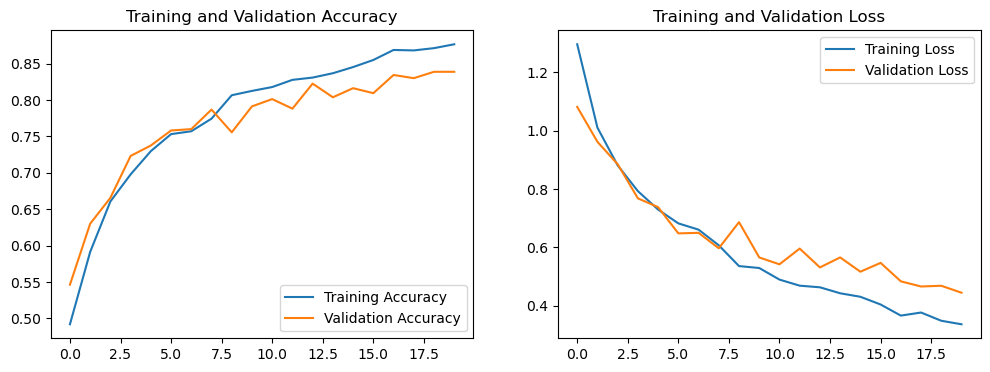

In [31]:
# Model Evaluation

# Plot the training and validation accuracy and loss at each epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(20)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Save the model
model.save('CNN.h5')

